<a href="https://colab.research.google.com/github/CamillaSemenzzatt/PROJETO-APLICADO-III/blob/main/Condi%C3%A7%C3%A3o%20de%20ocupa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget -O Condicao_de_ocupacao.xlsx 'https://github.com/CamillaSemenzzatt/PROJETO-APLICADO-III/raw/f5d74b93d72896c0fde868189b249e5ba019657d/tabela4092.xlsx'

tabela = pd.read_excel('Condicao_de_ocupacao.xlsx')

print(tabela)

tabela = tabela.drop([0, 1])
tabela = tabela.reset_index(drop=True)


tabela = tabela.rename(columns={
    'Tabela 4092 - Pessoas de 14 anos ou mais de idade, por condição em relação à força de trabalho e condição de ocupação': 'municipio',
    'Unnamed: 1': 'trimestre',
    'Unnamed: 2': 'Condição de ocupação',
    'Unnamed: 3': 'quantidade'
})

tabela = tabela.drop(tabela.index[-1])

--2025-03-23 14:55:00--  https://github.com/CamillaSemenzzatt/PROJETO-APLICADO-III/raw/f5d74b93d72896c0fde868189b249e5ba019657d/tabela4092.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CamillaSemenzzatt/PROJETO-APLICADO-III/f5d74b93d72896c0fde868189b249e5ba019657d/tabela4092.xlsx [following]
--2025-03-23 14:55:00--  https://raw.githubusercontent.com/CamillaSemenzzatt/PROJETO-APLICADO-III/f5d74b93d72896c0fde868189b249e5ba019657d/tabela4092.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82998 (81K) [application/octet-stream]
Saving to: ‘Condicao_de_ocupacao.xlsx’

Condicao_de_ocupaca 

In [ ]:
from tabulate import tabulate

tabela_lista = tabela.values.tolist()

tabela_lista.insert(0, tabela.columns.tolist())

print(tabulate(tabela_lista, headers="firstrow", tablefmt="grid"))

+---------------------+-------------------+--------------------------------+--------------+
| municipio           | trimestre         | Condição de ocupação           | quantidade   |
+=====================+===================+================================+==============+
| Porto Velho (RO)    | 1º trimestre 2012 | Força de trabalho              | 221          |
+---------------------+-------------------+--------------------------------+--------------+
| Porto Velho (RO)    | 1º trimestre 2012 | Força de trabalho - ocupada    | 201          |
+---------------------+-------------------+--------------------------------+--------------+
| Porto Velho (RO)    | 1º trimestre 2012 | Força de trabalho - desocupada | 20           |
+---------------------+-------------------+--------------------------------+--------------+
| Porto Velho (RO)    | 1º trimestre 2012 | Fora da força de trabalho      | 120          |
+---------------------+-------------------+--------------------------------+----

In [ ]:
tabela = tabela.fillna(method='ffill')

ultima_palavra_valida = {coluna: None for coluna in tabela.columns}

for index, row in tabela.iterrows():
    for coluna in tabela.columns:
        if pd.isnull(row[coluna]):
            if ultima_palavra_valida[coluna] is not None:
                tabela.loc[index, coluna] = ultima_palavra_valida[coluna]
        else:
            ultima_palavra_valida[coluna] = row[coluna]
            for outra_coluna in tabela.columns:
                if outra_coluna != coluna and pd.isnull(row[outra_coluna]):
                    ultima_palavra_valida[outra_coluna] = None

<ipython-input-35-a325dbb0453d>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tabela = tabela.fillna(method='ffill')


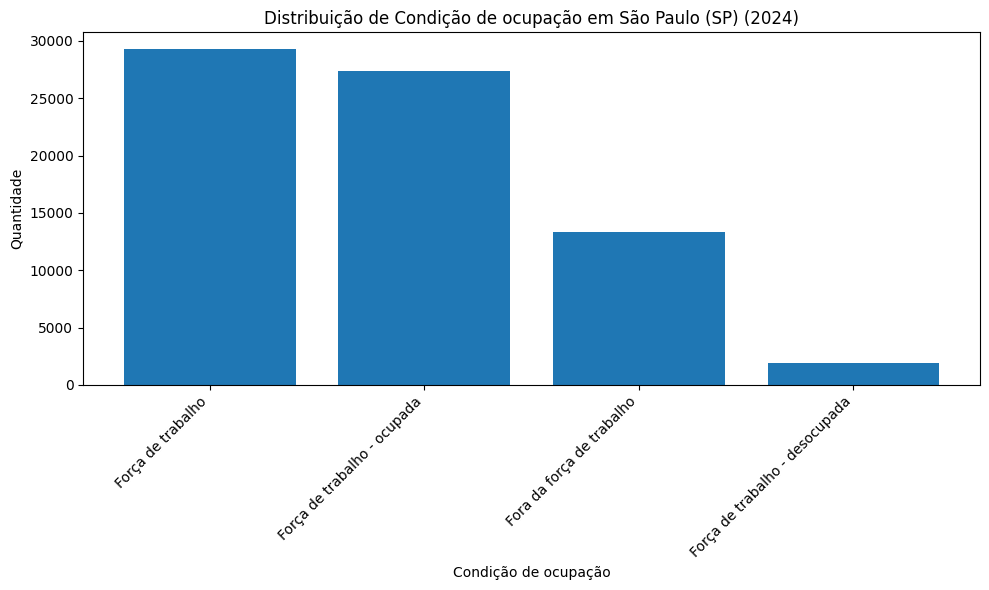

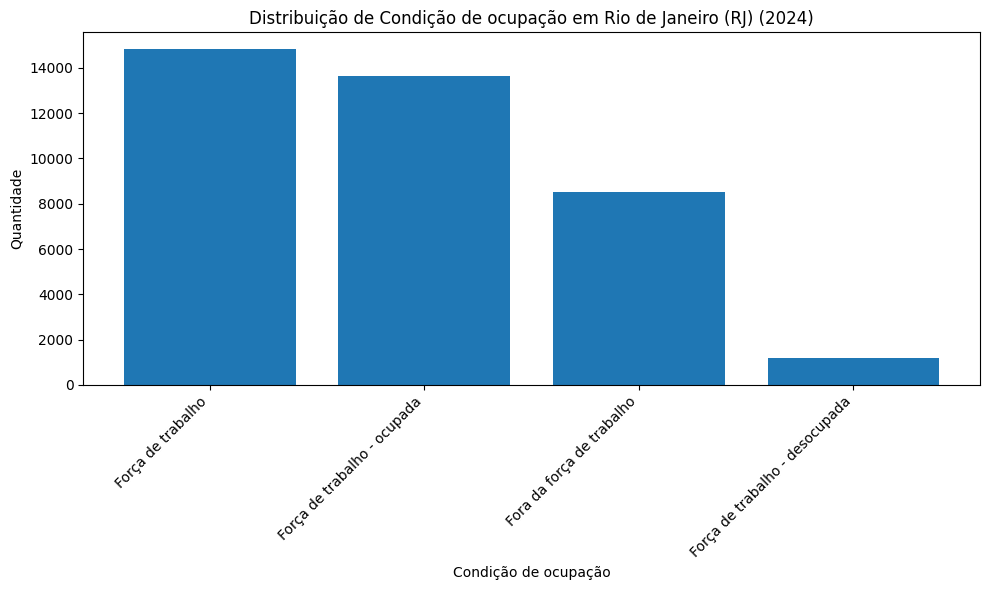

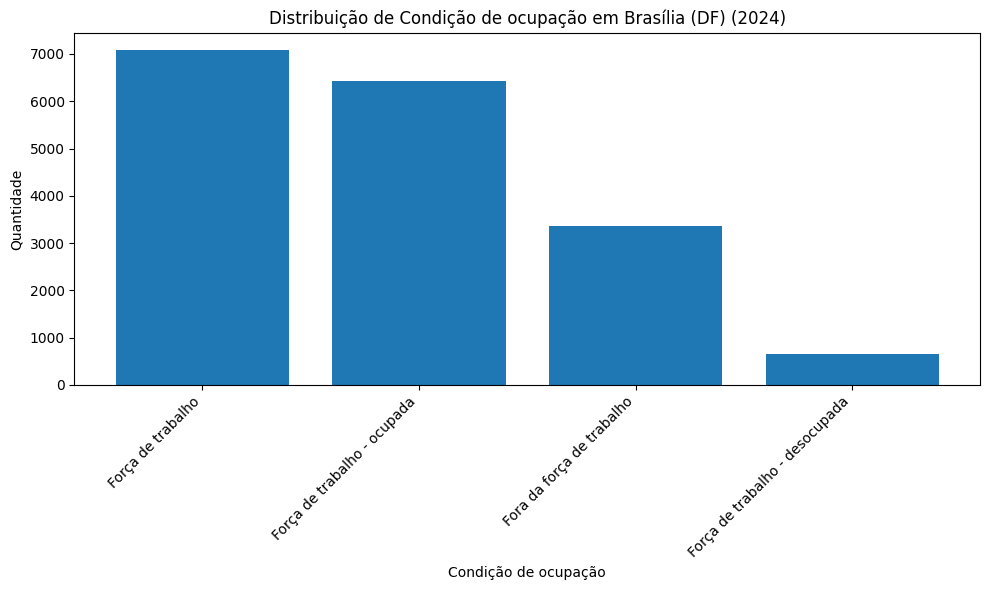

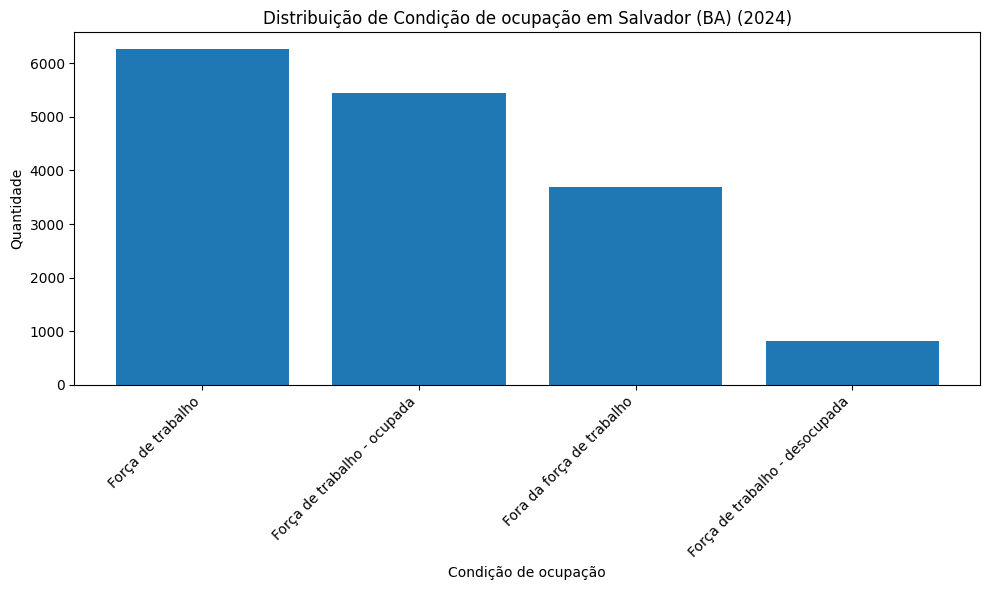

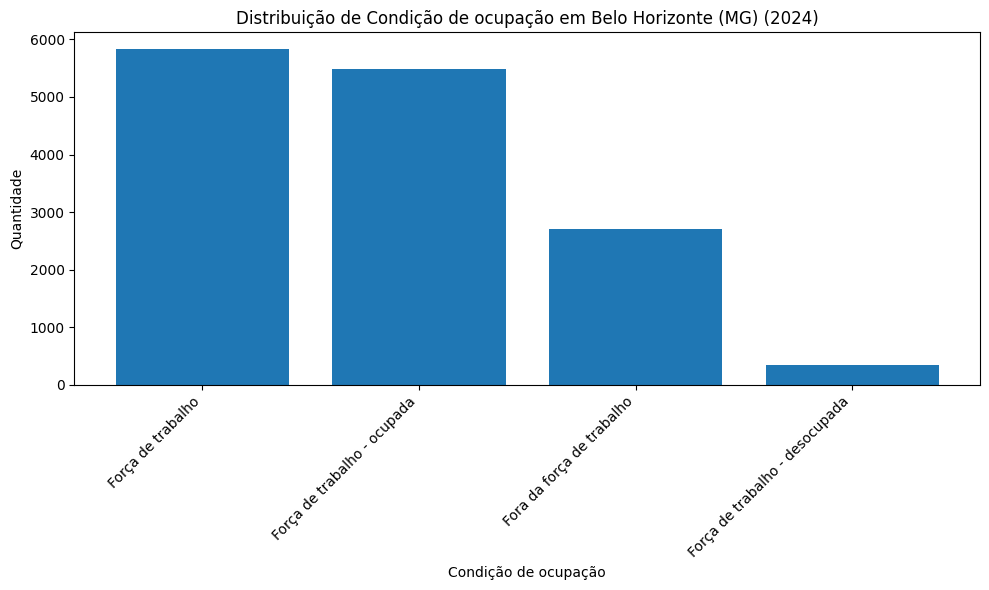

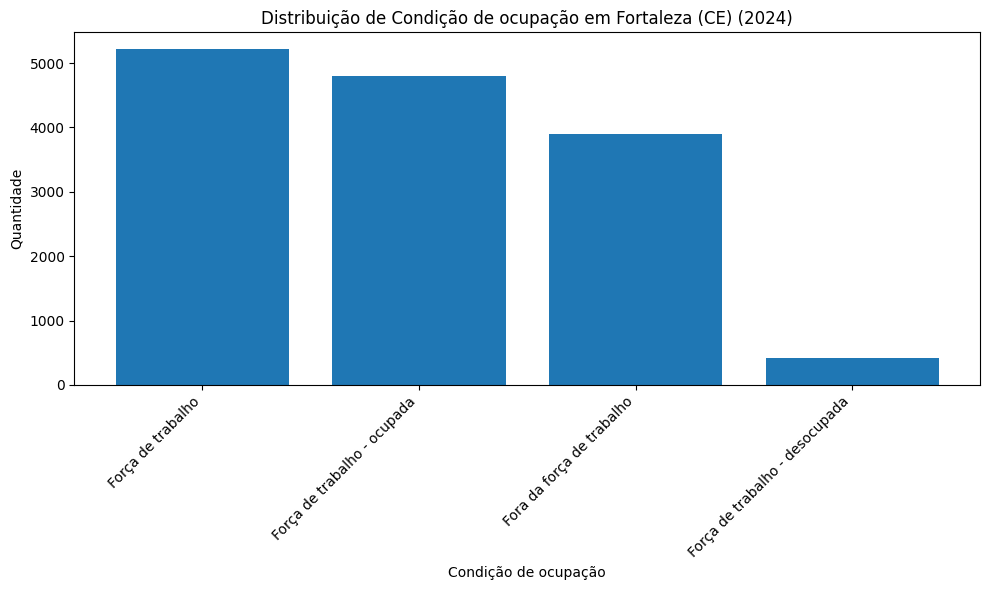

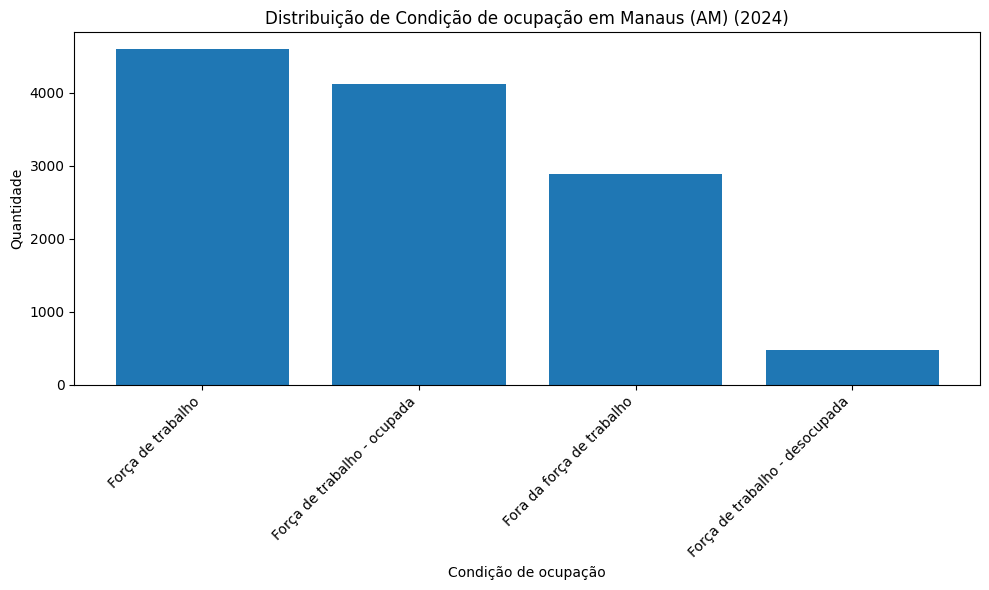

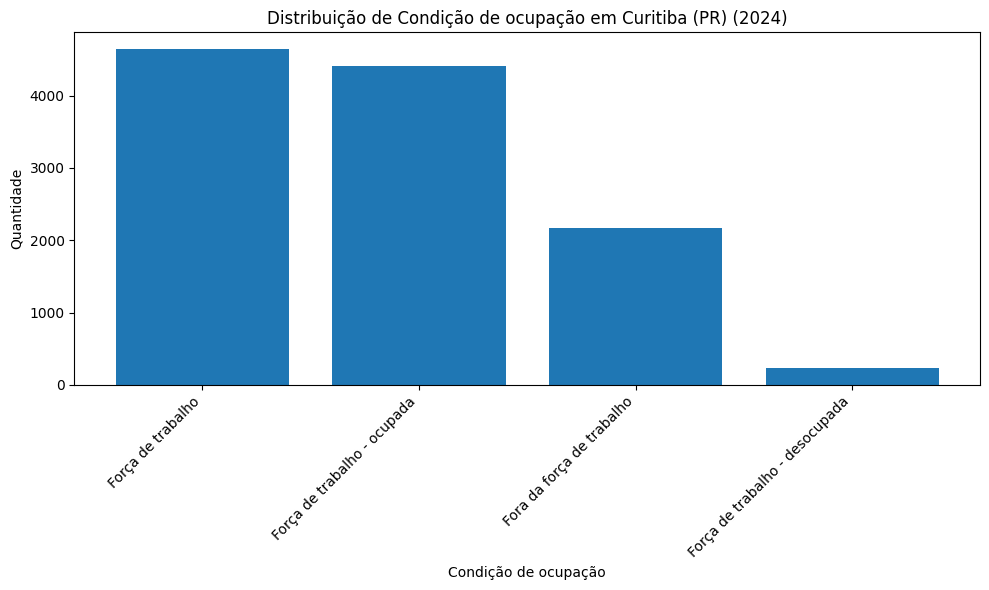

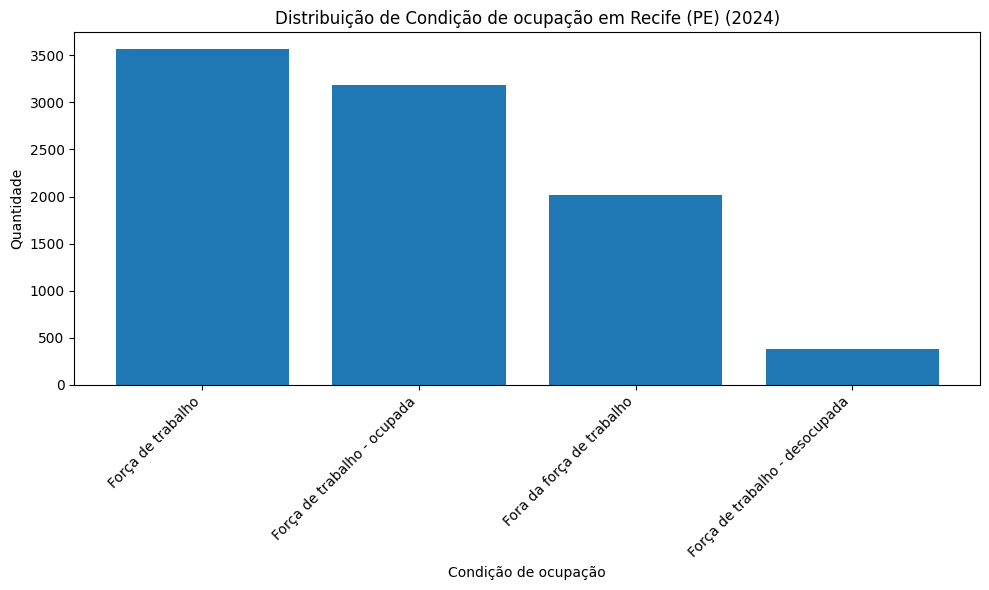

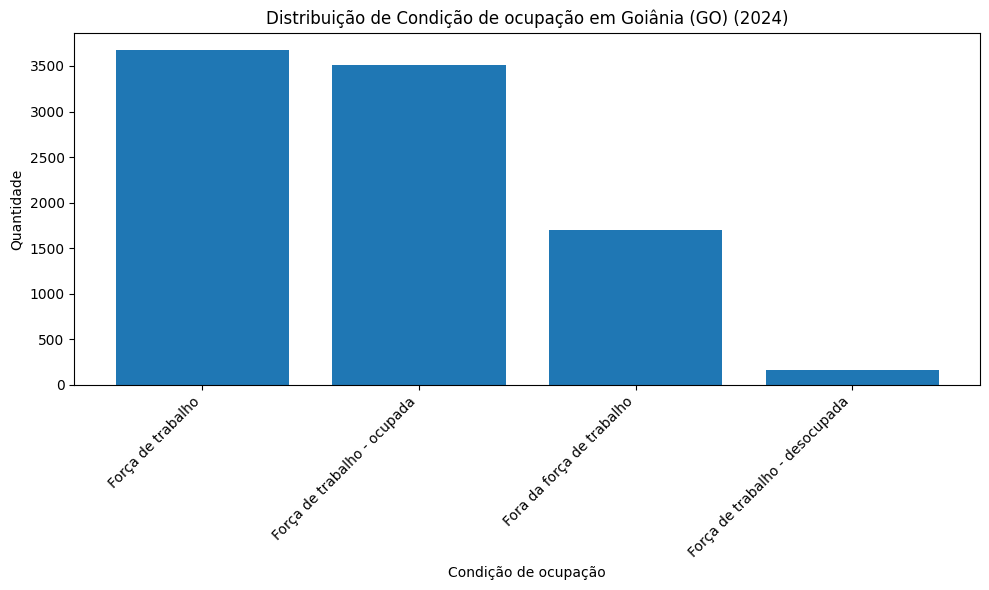

In [ ]:
tabela['quantidade'] = pd.to_numeric(tabela['quantidade'], errors='coerce')

tabela_2024 = tabela[tabela['trimestre'].str.contains('2024', na=False)]

dados_agrupados = tabela_2024.groupby('municipio')['quantidade'].sum().reset_index()
maiores_ofensores = dados_agrupados.sort_values(by=['quantidade'], ascending=False).head(10)['municipio'].tolist()

all_condicoes = tabela_2024['Condição de ocupação'].unique()

for municipio in maiores_ofensores:
    dados_municipio = tabela_2024[tabela_2024['municipio'] == municipio]
    dados_agrupados_posicao = dados_municipio.groupby('Condição de ocupação')['quantidade'].sum().reset_index()
    dados_agrupados_posicao = dados_agrupados_posicao.set_index('Condição de ocupação').reindex(all_condicoes, fill_value=0).reset_index()
    dados_agrupados_posicao = dados_agrupados_posicao.sort_values(by=['quantidade'], ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(dados_agrupados_posicao['Condição de ocupação'], dados_agrupados_posicao['quantidade'])
    plt.xlabel('Condição de ocupação')
    plt.ylabel('Quantidade')
    plt.title(f'Distribuição de Condição de ocupação em {municipio} (2024)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

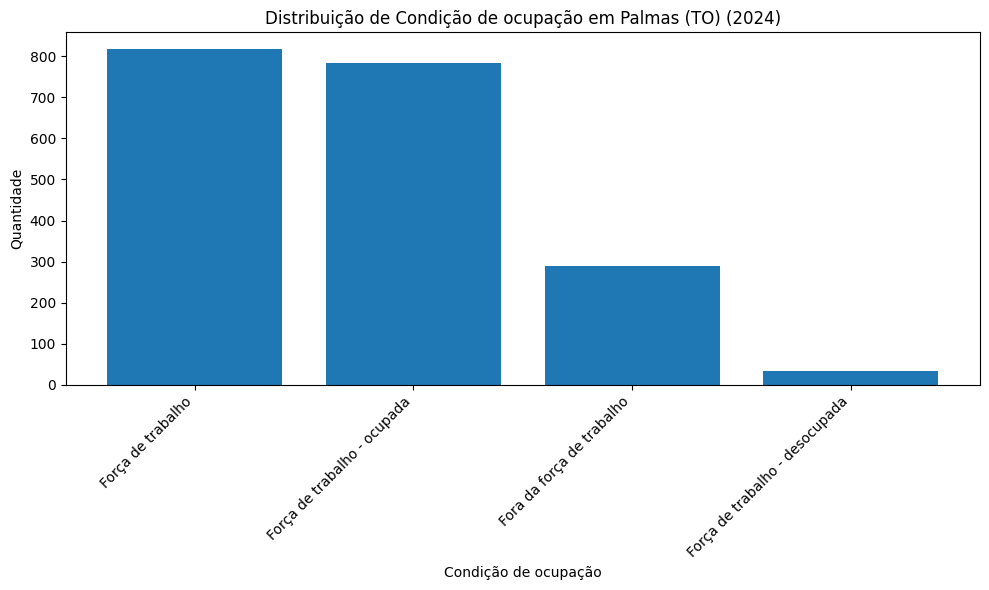

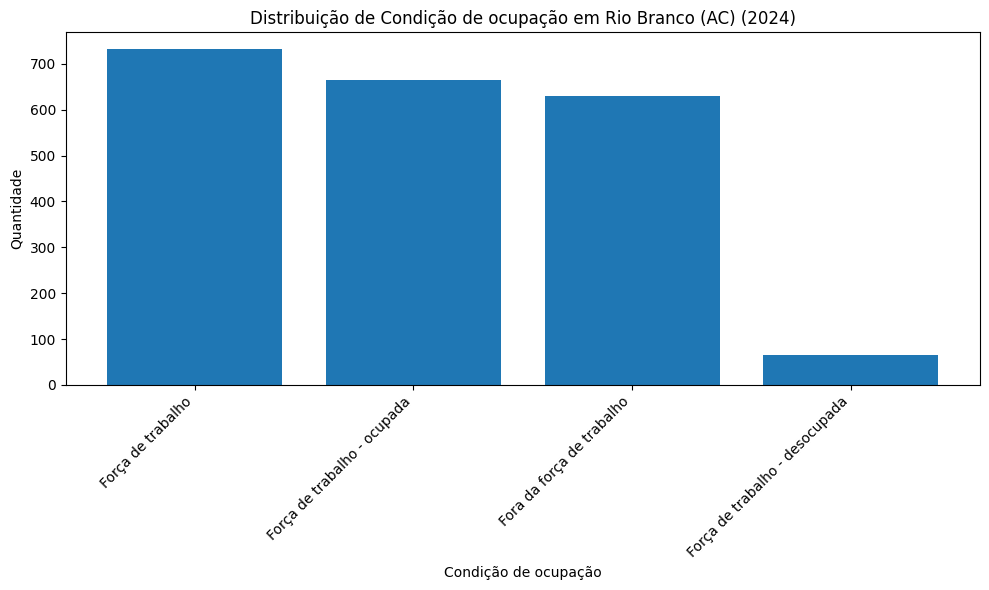

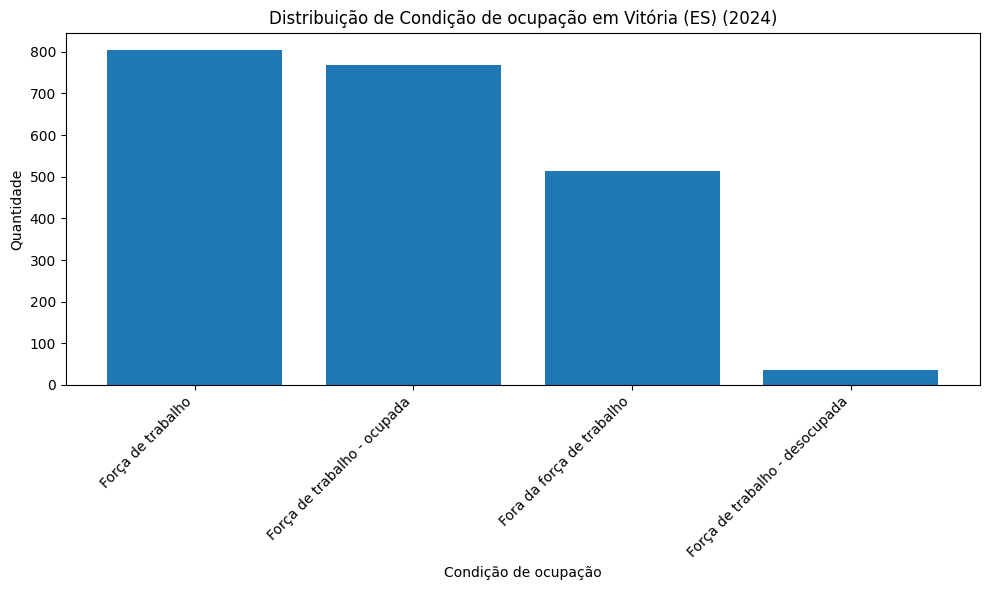

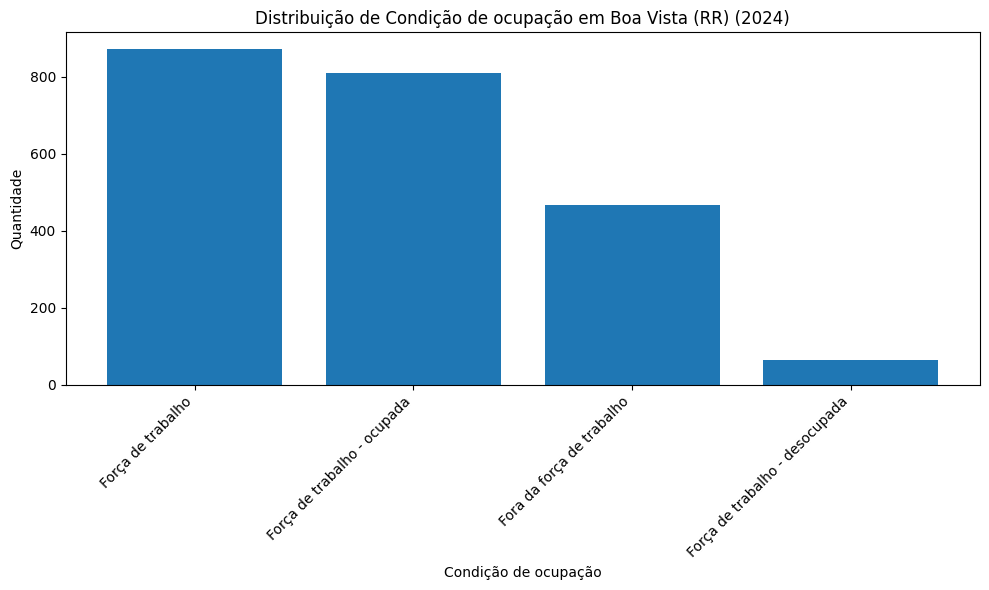

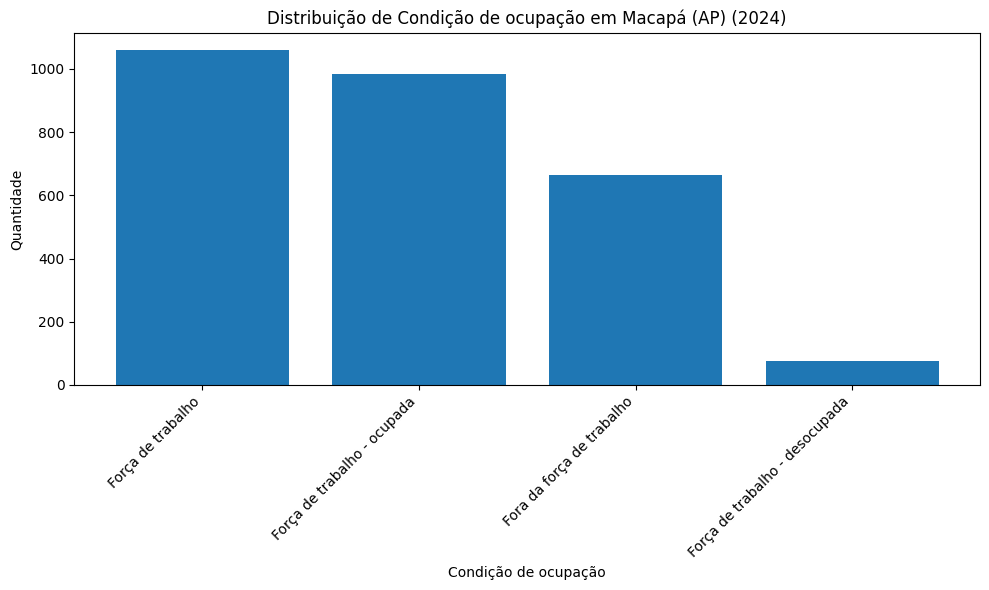

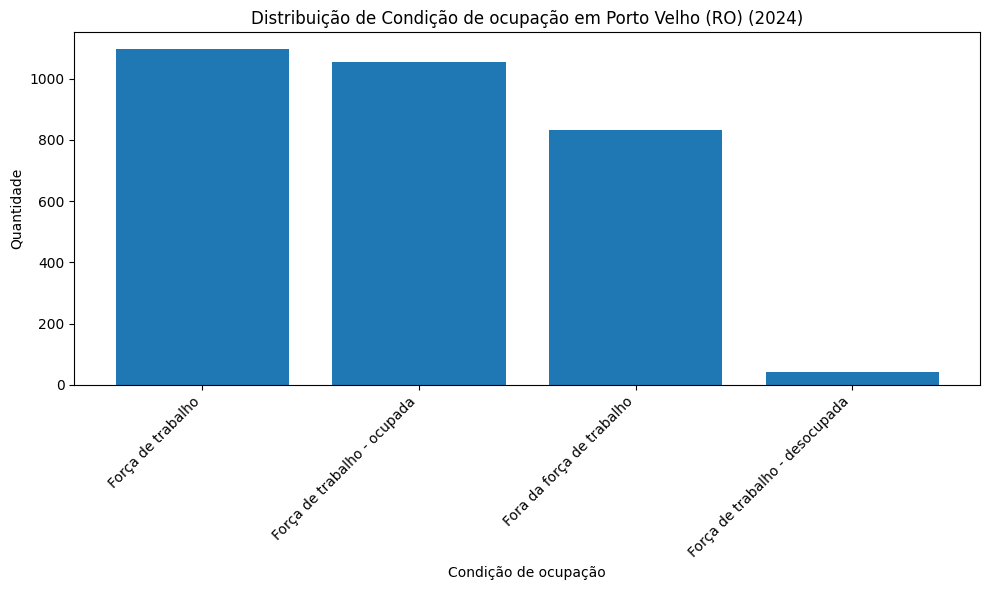

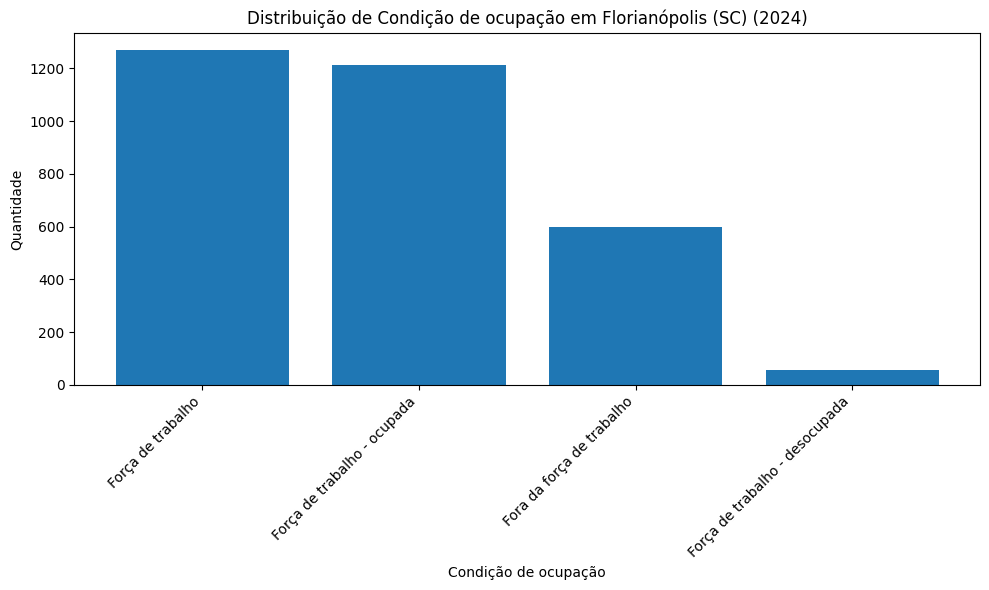

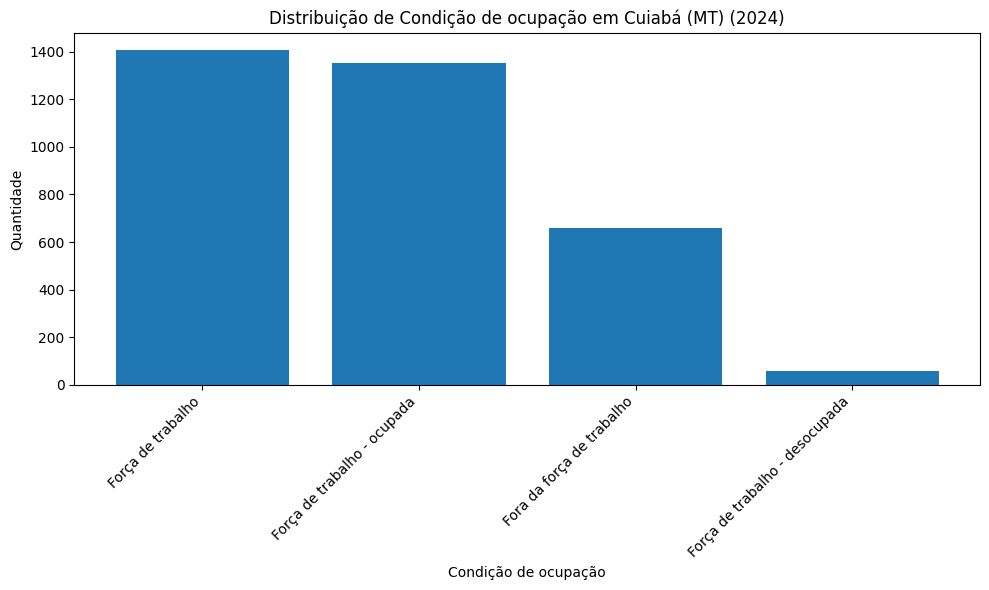

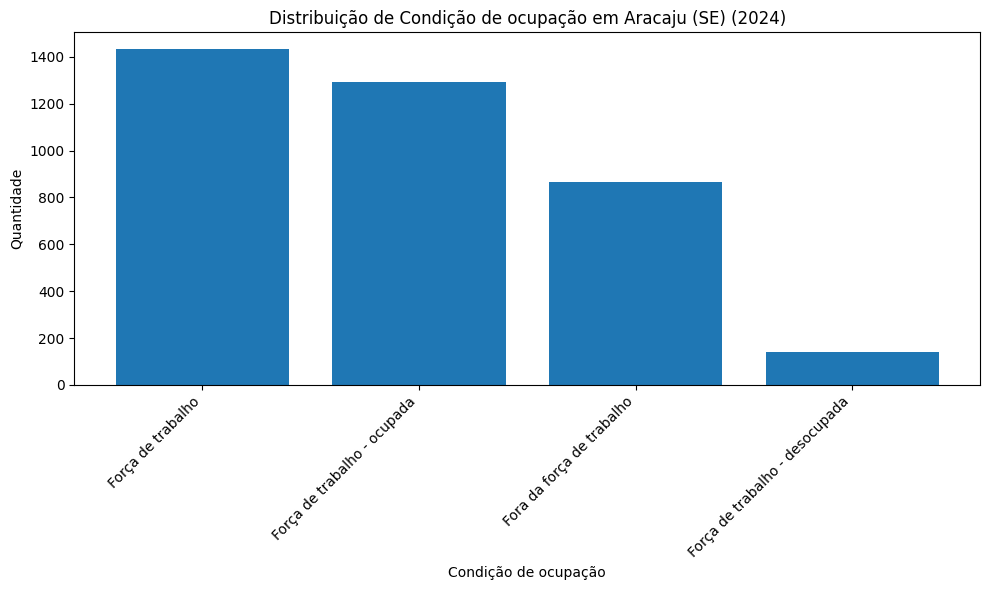

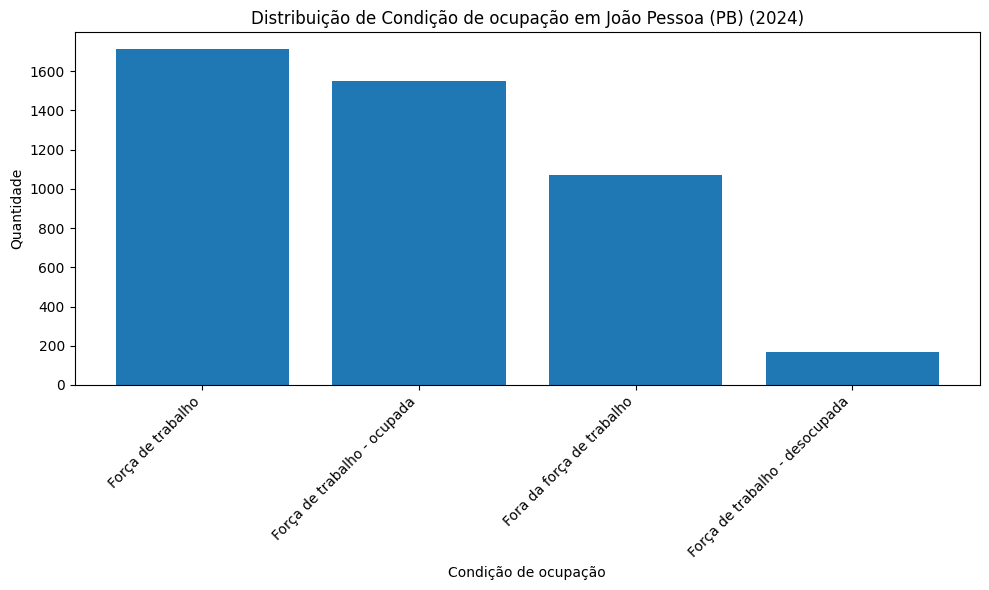

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

tabela['quantidade'] = pd.to_numeric(tabela['quantidade'], errors='coerce')

tabela_2024 = tabela[tabela['trimestre'].str.contains('2024', na=False)]

dados_agrupados = tabela_2024.groupby('municipio')['quantidade'].sum().reset_index()
menores_ofensores = dados_agrupados.sort_values(by=['quantidade'], ascending=True).head(10)['municipio'].tolist()

all_condicoes = tabela_2024['Condição de ocupação'].unique()

for municipio in menores_ofensores:
    dados_municipio = tabela_2024[tabela_2024['municipio'] == municipio]
    dados_agrupados_posicao = dados_municipio.groupby('Condição de ocupação')['quantidade'].sum().reset_index()
    dados_agrupados_posicao = dados_agrupados_posicao.set_index('Condição de ocupação').reindex(all_condicoes, fill_value=0).reset_index()
    dados_agrupados_posicao = dados_agrupados_posicao.sort_values(by=['quantidade'], ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(dados_agrupados_posicao['Condição de ocupação'], dados_agrupados_posicao['quantidade'])
    plt.xlabel('Condição de ocupação')
    plt.ylabel('Quantidade')
    plt.title(f'Distribuição de Condição de ocupação em {municipio} (2024)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()